In [1]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Load the data from the JSON file
with open('AdaNEW.json') as file:
    data = json.load(file)

adjectives_per_author = {}

for author_data in data:
    author_name = author_data['name']
    existing_text = author_data['existing_text']
    generated_texts = [author_data[f'generated_text{i+1}'] for i in range(2)]

    # Tokenize and tag the words in the existing text
    existing_words = word_tokenize(existing_text)
    existing_tagged_words = pos_tag(existing_words)

    # Collect the adjectives from the existing text
    existing_adjectives = [word for word, pos in existing_tagged_words if pos.startswith('JJ')]

    # Collect the adjectives from the generated texts
    generated_adjectives = []
    for generated_text in generated_texts:
        generated_words = word_tokenize(generated_text)
        generated_tagged_words = pos_tag(generated_words)
        generated_adjectives.extend([word for word, pos in generated_tagged_words if pos.startswith('JJ')])

    # Count the occurrences of each adjective
    adjective_counts = Counter(existing_adjectives + generated_adjectives)

    # Store the adjective counts for the author
    adjectives_per_author[author_name] = adjective_counts

# Save the adjectives per author in a JSON file
output_data = {'adjectives_per_author': adjectives_per_author}

with open('adjAda.json', 'w') as output_file:
    json.dump(output_data, output_file, indent=4)

print("Adjectives per author have been saved in adjectivesFEW.json.")


Adjectives per author have been saved in adjectivesFEW.json.


In [3]:
import json

# Define the filenames of the JSON files for each model
json_files = {
    'ada': 'adjAda.json',
    'curie': 'adjCurie.json',
    'turbo': 'adjTurbo.json',
    'davinci': 'adjDavinci.json'
}

# Initialize a dictionary to store the combined adjectives for each author
combined_adjectives = {}

# Read and merge adjectives from all models
for model, file_name in json_files.items():
    with open(file_name, 'r') as json_file:
        data = json.load(json_file)
        for author, adjectives in data['adjectives_per_author'].items():
            if author not in combined_adjectives:
                combined_adjectives[author] = {}
            combined_adjectives[author][model] = list(adjectives.keys())

# Define the output JSON file
output_json_file = 'combined_adjective.json'

# Save the combined data to a JSON file
with open(output_json_file, 'w') as json_output:
    json.dump(combined_adjectives, json_output, indent=4)

print(f'Combined data has been saved to {output_json_file}')


Combined data has been saved to combined_adjective.json


In [33]:
import json
import csv
# Load the data from the JSON file
with open('combined_adjective.json') as file:
    data = json.load(file)

# Initialize a list to store the results
results_list = []

# Iterate through each author and their data
for author, models in data.items():
    for model, adjectives in models.items():
        # Calculate the number of adjectives
        num_adjectives = len(adjectives)
        
        # Find the two most used adjectives
        adjectives_counts = {}
        for adjective in adjectives:
            adjectives_counts[adjective] = adjectives_counts.get(adjective, 0) + 1
        
        most_used_adjectives = sorted(adjectives_counts.items(), key=lambda x: x[1], reverse=True)[:2]
        
        # Prepare a row for CSV
        row = [author, model, num_adjectives]
        for adj, count in most_used_adjectives:
            row.extend([adj, count])
        
        # Append the row to the results list
        results_list.append(row)

# Define the CSV file header
header = ["Author", "Model", "Num_Adjectives", "Top_Adjective_1","Top_Adjective_2"]

# Save the results to a CSV file
with open("results.csv", "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(header)
    writer.writerows(results_list)

print("Results saved to 'results.csv'.")






Results saved to 'results.csv'.


In [1]:
import csv

# Define the input CSV file path
input_file = "results.csv"

# Define the models for which you want to create separate CSV files
models = ["ada", "davinci", "curie", "turbo"]

# Iterate through each model and create a separate CSV file
for model in models:
    # Define the output CSV file path for the current model
    output_file = f"{model}_output.csv"
    
    # Open the input and output CSV files
    with open(input_file, "r") as csvfile, open(output_file, "w", newline="") as outfile:
        reader = csv.DictReader(csvfile)
        
        # Define the headers for the output CSV file
        fieldnames = ["Author", "Num_Adjectives", "Top_Adjective_1", "Top_Adjective_2"]
        
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()
        
        # Iterate through the rows in the input CSV file
        for row in reader:
            if row["Model"] == model:
                # Write the filtered rows to the output CSV file
                writer.writerow({
                    "Author": row["Author"],
                    "Num_Adjectives": row["Num_Adjectives"],
                    "Top_Adjective_1": row["Top_Adjective_1"],
                    "Top_Adjective_2": row["Top_Adjective_2"]
                })

print("Separate CSV files created for each model.")


Separate CSV files created for each model.


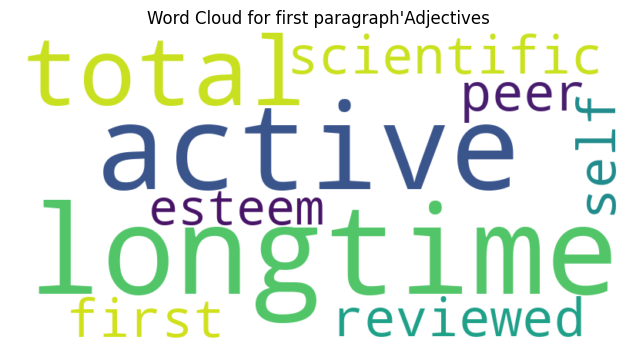

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Sample data (replace this with your dataset)
data = {
    "Author": ["Ben Shneiderman", "Fabian Beck", "Mary Jean Harrold", "Stephan Diehl", "Daniel Weiskopf", "Michael Burch", "James A. Jones", "Catherine Plaisant", "Benjamin B. Bederson", "Stuart K. Card", "Achim Ebert", "Mary C. Whitton", "Henry Fuchs", "Dieter Schmalstieg", "Anna Celler", "Ghassan Hamarneh", "Xenophon Papademetris", "Penny Rheingans", "Marie desJardins", "Carla E. Brodley"],
    "Model": ["ada", "curie", "turbo", "davinci"] * 5,
    "Num_Adjectives": [4, 6, 9, 6, 7, 3, 7, 8, 3, 4, 5, 7, 7, 2, 5, 10, 5, 4, 4, 8],
    "Top_Adjective_1": ["active", "active", "active", "active", "active", "active", "longtime", "active", "active", "total", "active", "longtime", "active", "active", "active", "active", "longtime", "longtime", "longtime", "longtime"],
    "Top_Adjective_2": ["longtime", "total", "longtime", "longtime", "scientific", "peer-reviewed", "total", "longtime", "longtime", "first", "longtime", "total", "longtime", "longtime", "total", "self-esteem", "total", "total", "total", "total"]
}

df = pd.DataFrame(data)

# Combine adjectives from all models
all_adjectives = ' '.join(df["Top_Adjective_1"] + ' ' + df["Top_Adjective_2"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_adjectives)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for first paragraph'Adjectives")
plt.axis("off")
plt.show()
